In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load Modeling data 
dec_merged = pd.read_csv('C:/Users/rober/Downloads/Dec_modeling.csv', index_col= None, header= 0) 

In [3]:
dec_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558026 entries, 0 to 558025
Data columns (total 25 columns):
DAY_OF_MONTH          558026 non-null int64
DAY_OF_WEEK           558026 non-null int64
OP_UNIQUE_CARRIER     558026 non-null object
TAIL_NUM              558026 non-null object
ORIGIN_AIRPORT_ID     558026 non-null int64
ORIGIN                558026 non-null object
DEST                  558026 non-null object
DEP_DEL15             558026 non-null float64
DEP_TIME_BLK          558026 non-null object
ARR_TIME_BLK          558026 non-null object
CANCELLED             558026 non-null float64
CRS_ELAPSED_TIME      558026 non-null float64
DISTANCE              558026 non-null float64
DISTANCE_GROUP        558026 non-null int64
AIRLINE_ID            558026 non-null int64
CARRIER_NAME          558026 non-null object
PILOTS_COPILOTS       558026 non-null int64
PASSENGER_HANDLING    558026 non-null int64
PASS_GEN_SVC_ADMIN    558026 non-null int64
MAINTENANCE           558026 non-null 

In [4]:
dec_merged.shape

(558026, 25)

# Data Cleaning

All missing values were imputed or dropped, as described above. Since our data has been validated by the Bureau of Transportation Statistics and Climate Data Online, outliers were investigated by reviewing the summary statistics of our data set. 



In [5]:
dec_merged.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEP_DEL15,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,AIRLINE_ID,PILOTS_COPILOTS,PASSENGER_HANDLING,PASS_GEN_SVC_ADMIN,MAINTENANCE,PRCP,SNOW,SNWD,TMAX,AWND
count,558026.000000,558026.000000,558026.000000,558026.000000,558026.0,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000
mean,15.830902,3.938745,12666.002996,0.208399,0.0,148.552937,843.568687,3.844704,19954.738880,6132.518447,7380.776432,9991.061352,3576.673642,0.116641,0.048059,0.121935,56.160668,8.137934
std,8.957760,2.085336,1514.187330,0.406164,0.0,74.475448,604.827406,2.372199,368.971181,3163.783165,5905.764240,6417.203879,3092.215270,0.352309,0.347030,0.806783,14.612596,4.014022
min,1.000000,1.000000,10140.000000,0.000000,0.0,34.000000,66.000000,1.000000,19393.000000,586.000000,0.000000,154.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,8.000000,2.000000,11292.000000,0.000000,0.0,94.000000,400.000000,2.000000,19790.000000,2444.000000,1407.000000,3592.000000,898.000000,0.000000,0.000000,0.000000,45.000000,4.920000
50%,16.000000,4.000000,12889.000000,0.000000,0.0,130.000000,680.000000,3.000000,19930.000000,7637.000000,8586.000000,15237.000000,2482.000000,0.000000,0.000000,0.000000,56.000000,7.610000
75%,23.000000,6.000000,13931.000000,0.000000,0.0,179.000000,1075.000000,5.000000,20314.000000,8989.000000,9668.000000,15502.000000,6122.000000,0.040000,0.000000,0.000000,67.000000,10.510000
max,31.000000,7.000000,15919.000000,1.000000,0.0,705.000000,5095.000000,11.000000,20436.000000,9293.000000,16888.000000,15809.000000,9677.000000,7.130000,13.300000,18.100000,87.000000,25.720000


Evaluation of min and max values indicate that outliers do not exist. Also, thanks to the preprocessing of our datasets before merging, duplicates and formatting issues were already resolved.


## 1. Feature Selection 

- We will disregard columns with IDs
- Also drop any redundant columns such as having only 1 distinct value 
- Since we have both the distance and distance group column, it is redundant or DEP_TIME_BLK vs. ARR_TIME_BLK

In [6]:
dec_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558026 entries, 0 to 558025
Data columns (total 25 columns):
DAY_OF_MONTH          558026 non-null int64
DAY_OF_WEEK           558026 non-null int64
OP_UNIQUE_CARRIER     558026 non-null object
TAIL_NUM              558026 non-null object
ORIGIN_AIRPORT_ID     558026 non-null int64
ORIGIN                558026 non-null object
DEST                  558026 non-null object
DEP_DEL15             558026 non-null float64
DEP_TIME_BLK          558026 non-null object
ARR_TIME_BLK          558026 non-null object
CANCELLED             558026 non-null float64
CRS_ELAPSED_TIME      558026 non-null float64
DISTANCE              558026 non-null float64
DISTANCE_GROUP        558026 non-null int64
AIRLINE_ID            558026 non-null int64
CARRIER_NAME          558026 non-null object
PILOTS_COPILOTS       558026 non-null int64
PASSENGER_HANDLING    558026 non-null int64
PASS_GEN_SVC_ADMIN    558026 non-null int64
MAINTENANCE           558026 non-null 

Of the 24 features remaining in our dataset, several were redundant upon inspection. ORIGIN_AIRPORT_ID is redundant with ORIGIN. ARR_TIME_BLK, which represents the arrival time block, is redundant with the combination of DEP_TIME_BLK and CRS_ELAPSED_TIME, or the schedule length of the flight, and DISTANCE_GROUP, or the distance of the flight. AIRLINE_ID is redundant with CARRIER_NAME. DISTANCE is redundant with the DISTANCE_GROUP binned feature. Since CRS_ELAPSED_TIME would be a function of the distance traveled, it was also dropped. OP_UNIQUE_CARRIER is redundant with CARRIER_NAME, which is also easier to interpret in subsequent sections, therefore OP_UNIQUE_CARRIER will be dropped. Since all cancelled flights were removed, the CANCELLED feature is irrelevant. This left 17 features in our dataset. Some features, such as CARRIER_NAME, ORIGIN, and DEST will not be used in modeling but are retained for later use.


In [7]:
dropped = ['TAIL_NUM','ORIGIN_AIRPORT_ID', 'ARR_TIME_BLK','CANCELLED','AIRLINE_ID','DISTANCE', 'CRS_ELAPSED_TIME', 'OP_UNIQUE_CARRIER']
dec_red = dec_merged.drop(dropped, axis=1)
dec_red.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_NAME,PILOTS_COPILOTS,PASSENGER_HANDLING,PASS_GEN_SVC_ADMIN,MAINTENANCE,PRCP,SNOW,SNWD,TMAX,AWND
0,8,7,STL,SAN,0.0,1100-1159,7,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
1,8,7,STL,SAT,0.0,1200-1259,4,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
2,8,7,STL,SAT,0.0,2100-2159,4,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
3,8,7,STL,SEA,0.0,0900-0959,7,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
4,8,7,STL,SFO,1.0,1800-1859,7,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84


In [8]:
dec_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558026 entries, 0 to 558025
Data columns (total 17 columns):
DAY_OF_MONTH          558026 non-null int64
DAY_OF_WEEK           558026 non-null int64
ORIGIN                558026 non-null object
DEST                  558026 non-null object
DEP_DEL15             558026 non-null float64
DEP_TIME_BLK          558026 non-null object
DISTANCE_GROUP        558026 non-null int64
CARRIER_NAME          558026 non-null object
PILOTS_COPILOTS       558026 non-null int64
PASSENGER_HANDLING    558026 non-null int64
PASS_GEN_SVC_ADMIN    558026 non-null int64
MAINTENANCE           558026 non-null int64
PRCP                  558026 non-null float64
SNOW                  558026 non-null float64
SNWD                  558026 non-null float64
TMAX                  558026 non-null float64
AWND                  558026 non-null float64
dtypes: float64(6), int64(7), object(4)
memory usage: 72.4+ MB


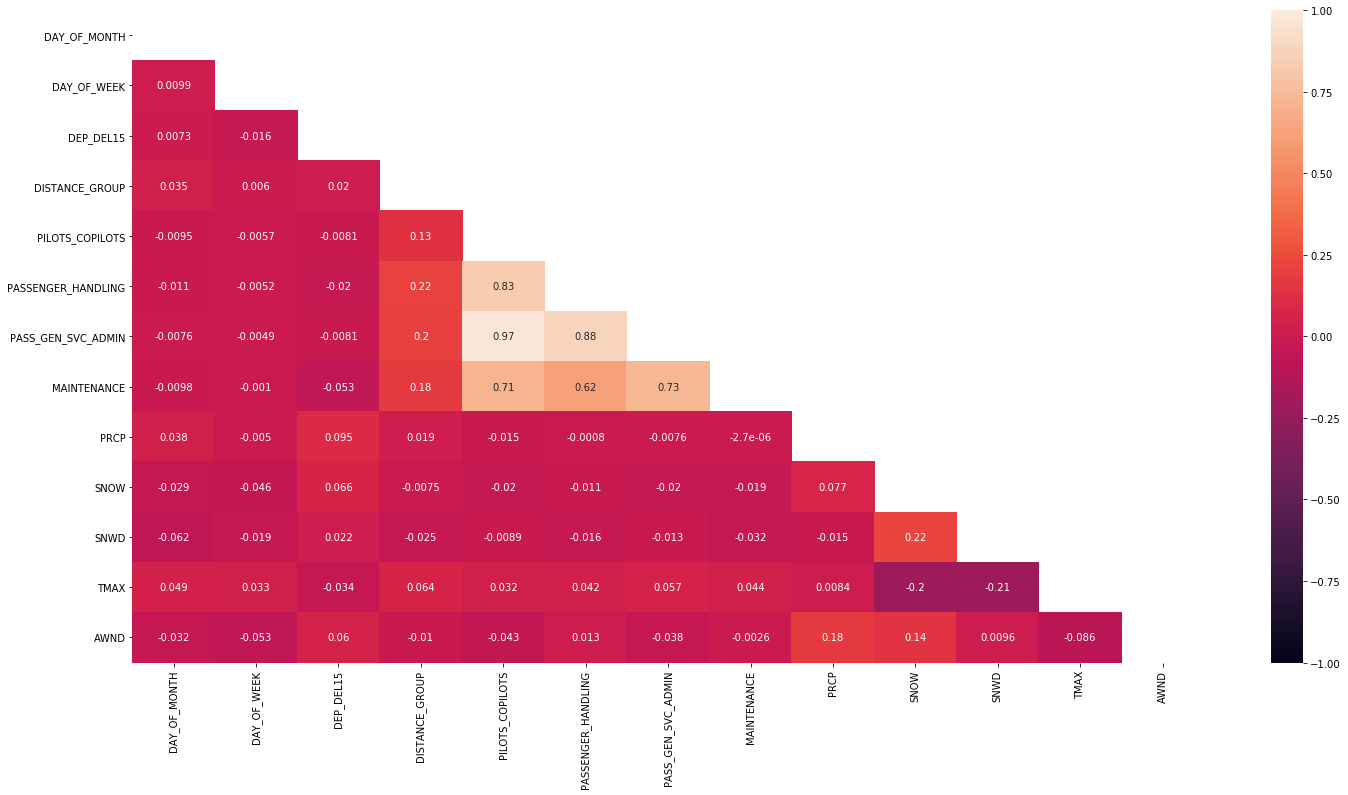

In [9]:
# Correlation Matrix for multicollinearity
plt.figure(figsize=(24, 12))
mask = np.triu(np.ones_like(dec_red.corr(), dtype=np.bool))
heatmap = sns.heatmap(dec_red.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

# Make the full heat map visible
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

## 2. Feature Creation

Since the day of the month did not show an easily identifiable pattern for departure delays, a new feature WEEK_OF_MONTH was created. This feature consists of 4 full (7-day) weeks and 1 partial (3-day) week. WEEK_OF_MONTH distributions for departure delay were evaluated to determine the optimal feature to use.
    
    WEEK_OF_MONTH

      1-7 = Week 1 = 1  
      8-14 = Week 2 = 2  
      15-21 = Week 3 = 3  
      22-28 = week 4 = 4  
      29-31 = partial week 5 = 5  

While DEP_TIME_BLK showed- REDUCE CARDINALITY OF DEPARTURE TIME BLOCKS (PREVIOUSLY 19 levels with inconsistent bucket size to 4 bins)

      Redeye/Early Departure = 12:01 a.m. - 5:59 a.m  = 1
      Morning Departure = 6:00 a.m - 11:59 a.m.  = 2
      Daytime Departure = 12:00 p.m. - 5:59 p.m = 3
      Late Departure = 6:00 p.m. - 11:59 p.m. = 4



### Create WEEK_OF_MONTH

In [10]:
def month_weeks_range(x):
    if x <= 7:
        return 1
    elif x <= 14:
        return 2
    elif x <= 21:
        return 3
    elif x <= 28:
        return 4
    else:
        return 5

dec_red['WEEK_OF_MONTH'] = dec_red['DAY_OF_MONTH'].apply(lambda x: month_weeks_range(x))
dec_red['WEEK_OF_MONTH'].value_counts()

3    129144
1    128108
2    125664
4    122390
5     52720
Name: WEEK_OF_MONTH, dtype: int64

In [11]:
# Explore DAY OF MONTH with DEP_DEL15
Week = pd.crosstab(dec_red['WEEK_OF_MONTH'], dec_red['DEP_DEL15'])
Week['Total'] = Week.sum(axis=1)
Week.loc['Total'] = Week.sum()
Week['Percent_Delayed'] = ((Week.iloc[:,1])/((Week.iloc[:,0])+(Week.iloc[:,1])))
Week = Week.sort_values('Percent_Delayed')
Week

DEP_DEL15,0.0,1.0,Total,Percent_Delayed
WEEK_OF_MONTH,,,,
2,102803,22861,125664,0.181922
Total,441734,116292,558026,0.208399
3,101636,27508,129144,0.213003
1,100715,27393,128108,0.213827
4,95691,26699,122390,0.218147
5,40889,11831,52720,0.224412


In [12]:
# Drop DAY_OF_MONTH in place of WEEK_OF_MONTH
dec_red.drop(columns=['DAY_OF_MONTH'], inplace = True)

### Transform DEP_TIME_BLK

In [13]:
dep_blk = {'0600-0659':2, '0700-0759':2, '0800-0859':2,
           '0900-0959':2,'1000-1059':2, '1100-1159':2,
           '1200-1259':3, '1300-1359':3, '1400-1459':3,
           '1500-1559':3, '1600-1659':3, '1700-1759':3,
           '1800-1859':4, '1900-1959':4,'2000-2059':4, 
           '2100-2159':4, '2200-2259':4, 
           '2200-2259':4, '2300-2359':4, '0001-0559':1}

dec_red['DEP_TIME_BLK'] = dec_red['DEP_TIME_BLK'].replace(dep_blk)
dec_red['DEP_TIME_BLK'].value_counts()

2    213792
3    197393
4    131938
1     14903
Name: DEP_TIME_BLK, dtype: int64

In [14]:
# Explore DEP_TIME_BLK with DEP_DEL15
DEP = pd.crosstab(dec_red['DEP_TIME_BLK'], dec_red['DEP_DEL15'])
DEP['Total'] = DEP.sum(axis=1)
DEP.loc['Total'] = DEP.sum()
DEP['Percent_Delayed'] = ((DEP.iloc[:,1])/((DEP.iloc[:,0])+(DEP.iloc[:,1])))
DEP = DEP.sort_values('Percent_Delayed')
DEP

DEP_DEL15,0.0,1.0,Total,Percent_Delayed
DEP_TIME_BLK,,,,
1,13563,1340,14903,0.089915
2,183722,30070,213792,0.140651
Total,441734,116292,558026,0.208399
3,150278,47115,197393,0.238686
4,94171,37767,131938,0.286248


## 3. Feature Transformation

Since the non-numeric features remaining in our dataset will not be ingested in the model, but used later to enhance findings, interpretations and recommendations, and we are using the XGBoost Classification algorithm for modeling purposes, further transformations are unnecessary. XGBoost is not sensitive to transformations or scaling of features in the same way that decision trees and random forest are not. By not scaling our features, we remove the need to scale subsequent data ingested by the model and facilitate easier interpretability of our model with real-world data.


In [15]:
# List remaining features and types
dec_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558026 entries, 0 to 558025
Data columns (total 17 columns):
DAY_OF_WEEK           558026 non-null int64
ORIGIN                558026 non-null object
DEST                  558026 non-null object
DEP_DEL15             558026 non-null float64
DEP_TIME_BLK          558026 non-null int64
DISTANCE_GROUP        558026 non-null int64
CARRIER_NAME          558026 non-null object
PILOTS_COPILOTS       558026 non-null int64
PASSENGER_HANDLING    558026 non-null int64
PASS_GEN_SVC_ADMIN    558026 non-null int64
MAINTENANCE           558026 non-null int64
PRCP                  558026 non-null float64
SNOW                  558026 non-null float64
SNWD                  558026 non-null float64
TMAX                  558026 non-null float64
AWND                  558026 non-null float64
WEEK_OF_MONTH         558026 non-null int64
dtypes: float64(6), int64(8), object(3)
memory usage: 72.4+ MB


## 4. Balance the data set

In [16]:
# Identify the imbalanced class
dec_red['DEP_DEL15'].value_counts()

0.0    441734
1.0    116292
Name: DEP_DEL15, dtype: int64

In [17]:
df_grouped_by =  dec_red.groupby(["DEP_DEL15"])
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()))
df_balanced.reset_index(drop=True, inplace =True)
df_balanced

,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_NAME,PILOTS_COPILOTS,PASSENGER_HANDLING,PASS_GEN_SVC_ADMIN,MAINTENANCE,PRCP,SNOW,SNWD,TMAX,AWND,WEEK_OF_MONTH
0,1,DAL,HOU,0.0,2,1,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,47.0,16.55,3
1,1,IAH,ORD,0.0,4,4,United Air Lines Inc.,7637,16888,15237,4991,0.00,0.0,0.0,84.0,11.86,5
2,2,PHL,BUF,0.0,2,2,"Midwest Airline, Inc.",2444,23,2273,787,0.17,0.0,0.0,58.0,12.75,2
3,7,MKE,MCI,0.0,2,2,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,44.0,10.74,2
4,3,FLL,MDW,0.0,3,5,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,74.0,4.03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232579,1,MDW,BWI,1.0,3,3,Southwest Airlines Co.,8989,9668,15475,2482,0.09,0.7,0.0,47.0,17.67,5
232580,1,LAS,MDW,1.0,3,7,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,57.0,2.01,1
232581,5,ONT,SMF,1.0,2,2,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,65.0,4.25,2
232582,7,LAS,SMF,1.0,2,2,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,54.0,2.91,4


In [18]:
# Confirm the majority class was undersampled
df_balanced['DEP_DEL15'].value_counts()

1.0    116292
0.0    116292
Name: DEP_DEL15, dtype: int64

## 5. Split the data set

In [19]:
# partition model used features
model = df_balanced.drop(['ORIGIN','DEST', 'CARRIER_NAME'], axis = 1)

# Move DEP_DEL15 to first position for modeling
Dep = model['DEP_DEL15']
model.drop(labels=['DEP_DEL15'], axis=1,inplace = True)
model.insert(0, 'DEP_DEL15', Dep)
model

,DEP_DEL15,DAY_OF_WEEK,DEP_TIME_BLK,DISTANCE_GROUP,PILOTS_COPILOTS,PASSENGER_HANDLING,PASS_GEN_SVC_ADMIN,MAINTENANCE,PRCP,SNOW,SNWD,TMAX,AWND,WEEK_OF_MONTH
0,0.0,1,2,1,8989,9668,15475,2482,0.00,0.0,0.0,47.0,16.55,3
1,0.0,1,4,4,7637,16888,15237,4991,0.00,0.0,0.0,84.0,11.86,5
2,0.0,2,2,2,2444,23,2273,787,0.17,0.0,0.0,58.0,12.75,2
3,0.0,7,2,2,8989,9668,15475,2482,0.00,0.0,0.0,44.0,10.74,2
4,0.0,3,3,5,8989,9668,15475,2482,0.00,0.0,0.0,74.0,4.03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232579,1.0,1,3,3,8989,9668,15475,2482,0.09,0.7,0.0,47.0,17.67,5
232580,1.0,1,3,7,8989,9668,15475,2482,0.00,0.0,0.0,57.0,2.01,1
232581,1.0,5,2,2,8989,9668,15475,2482,0.00,0.0,0.0,65.0,4.25,2
232582,1.0,7,2,2,8989,9668,15475,2482,0.00,0.0,0.0,54.0,2.91,4


In [21]:
# Split all data into 90% train and 10% holdout
df_train, df_holdout = train_test_split(model, test_size=0.10, stratify=model['DEP_DEL15'])

# Split holdout to 50% validation and 50% test
df_val, df_test = train_test_split(df_holdout, test_size=0.50, stratify=df_holdout['DEP_DEL15'])

add code to upload to bucket

In [22]:
df_train.shape

(209325, 14)

In [23]:
df_val.shape

(11629, 14)

In [24]:
df_test.shape

(11630, 14)